<a href="https://colab.research.google.com/github/EkaNisrina/tubesviskom/blob/main/ComputerVision_FinalPro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NISRINA EKA CITANINGTYAS_1301180207

# GLIP

Welcome to the demo notebook for GLIP https://github.com/microsoft/GLIP!

In [ ]:
# Install CUDA 10.2; newer versions of CUDA may fail
!apt-get update -y
!apt-get --purge remove "*cublas*" "cuda*" "nsight*" 
!nvcc --version

!wget https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64/cuda-ubuntu1804.pin
!mv cuda-ubuntu1804.pin /etc/apt/preferences.d/cuda-repository-pin-600
!wget https://developer.download.nvidia.com/compute/cuda/10.2/Prod/local_installers/cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!dpkg -i cuda-repo-ubuntu1804-10-2-local-10.2.89-440.33.01_1.0-1_amd64.deb
!apt-key add /var/cuda-repo-10-2-local-10.2.89-440.33.01/7fa2af80.pub
!apt-get update
!apt-get -y install cuda

Get:1 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  InRelease
Ign:1 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  InRelease
Get:2 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  Release [574 B]
Get:2 file:/var/cuda-repo-10-2-local-10.2.89-440.33.01  Release [574 B]
Hit:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:10 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:13 http://ppa.l

In [ ]:
# Install Environments. This will take a few minutes. Please be patient ;)
! nvidia-smi
! git clone https://github.com/microsoft/GLIP.git
%cd GLIP
! git checkout c663d9db8a503e04c6b76cd2e14152bab775d28a
! pip install torch==1.9.0 torchvision  torchaudio
! pip install einops shapely timm yacs tensorboardX ftfy prettytable pymongo
! pip install transformers
! python setup.py build develop --user
! mkdir MODEL

Sat Jan 14 01:41:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import requests
from io import BytesIO
from PIL import Image
import numpy as np
pylab.rcParams['figure.figsize'] = 20, 12
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.engine.predictor_glip import GLIPDemo

def load(url):
    """
    Given an url of an image, downloads the image and
    returns a PIL image
    """
    response = requests.get(url)
    pil_image = Image.open(BytesIO(response.content)).convert("RGB")
    # convert to BGR format
    image = np.array(pil_image)[:, :, [2, 1, 0]]
    return image

def imshow(img, caption):
    plt.imshow(img[:, :, [2, 1, 0]])
    plt.axis("off")
    plt.figtext(0.5, 0.09, caption, wrap=True, horizontalalignment='center', fontsize=20)

/content/GLIP/maskrcnn_benchmark/data/transforms/build.py:29: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if cfg.INPUT.FORMAT is not '':
/content/GLIP/maskrcnn_benchmark/data/datasets/evaluation/box_aug.py:72: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if cfg.INPUT.FORMAT is not '':
/content/GLIP/maskrcnn_benchmark/data/datasets/evaluation/box_aug.py:102: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if cfg.INPUT.FORMAT is not '':
/content/GLIP/maskrcnn_benchmark/modeling/language_backbone/clip_model.py:150: SyntaxWarning: "is" with a literal. Did you mean "=="?
  or pretrained_layers[0] is '*'
/content/GLIP/maskrcnn_benchmark/utils/c2_model_loading.py:162: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if old_key.find(param) is -1:
/content/GLIP/maskrcnn_benchmark/utils/big_model_loading.py:27: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if old_key.find(param) is -1:
/content/GLIP/maskrcnn_benchmark/utils/pretrai

In [ ]:
# Use this command for evaluate the GLPT-T model
! wget https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_tiny_model_o365_goldg_cc_sbu.pth -O MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth
config_file = "configs/pretrain/glip_Swin_T_O365_GoldG.yaml"
weight_file = "MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth"

# Use this command to evaluate the GLPT-L model
# ! wget https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_large_model.pth -O MODEL/glip_large_model.pth
# config_file = "configs/pretrain/glip_Swin_L.yaml"
# weight_file = "MODEL/glip_large_model.pth"

# update the config options with the config file
# manual override some options
cfg.local_rank = 0
cfg.num_gpus = 1
cfg.merge_from_file(config_file)
cfg.merge_from_list(["MODEL.WEIGHT", weight_file])
cfg.merge_from_list(["MODEL.DEVICE", "cuda"])

--2023-01-14 01:47:59--  https://penzhanwu2bbs.blob.core.windows.net/data/GLIPv1_Open/models/glip_tiny_model_o365_goldg_cc_sbu.pth
Resolving penzhanwu2bbs.blob.core.windows.net (penzhanwu2bbs.blob.core.windows.net)... 20.60.68.132
Connecting to penzhanwu2bbs.blob.core.windows.net (penzhanwu2bbs.blob.core.windows.net)|20.60.68.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3710104213 (3.5G) [application/octet-stream]
Saving to: ‘MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth’

MODEL/glip_tiny_mod 100%[===================>]   3.46G  6.16MB/s    in 9m 3s   

2023-01-14 01:57:03 (6.51 MB/s) - ‘MODEL/glip_tiny_model_o365_goldg_cc_sbu.pth’ saved [3710104213/3710104213]



In [ ]:
glip_demo = GLIPDemo(
    cfg,
    min_image_size=800,
    confidence_threshold=0.7,
    show_mask_heatmaps=False
)

VISION BACKBONE USE GRADIENT CHECKPOINTING:  False


Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

LANGUAGE BACKBONE USE GRADIENT CHECKPOINTING:  False


Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'bert.pooler.dense.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'bert.pooler.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B
EARLY FUSION ON, USING MHA-B


Next, we retrieve an image on which we wish to test the model. Here, we use an image from the validation set of COCO

/usr/local/lib/python3.8/dist-packages/transformers/modeling_utils.py:768: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 3.1048863250002796


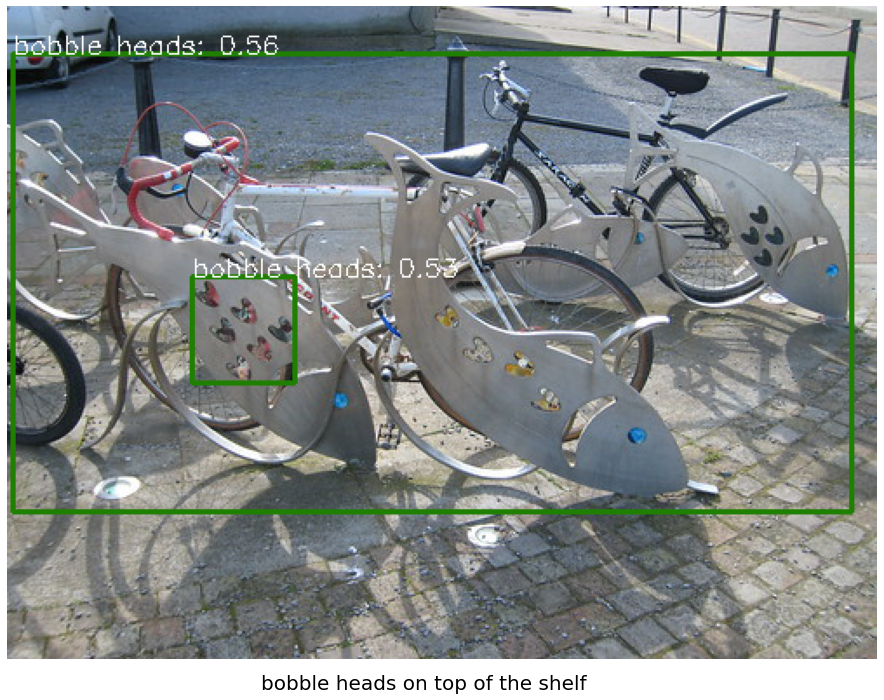

In [ ]:
image = load('http://farm4.static.flickr.com/3207/2450119520_d9f932da12.jpg?v=0')
caption = 'bobble heads on top of the shelf'
result, _ = glip_demo.run_on_web_image(image, caption, 0.5)
imshow(result, caption)

/usr/local/lib/python3.8/dist-packages/transformers/modeling_utils.py:768: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/torch/nn/functional.py:3825: UserWarning: nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample_bilinear is deprecated. Use nn.functional.interpolate instead.")


inference time per image: 0.6464629510001032


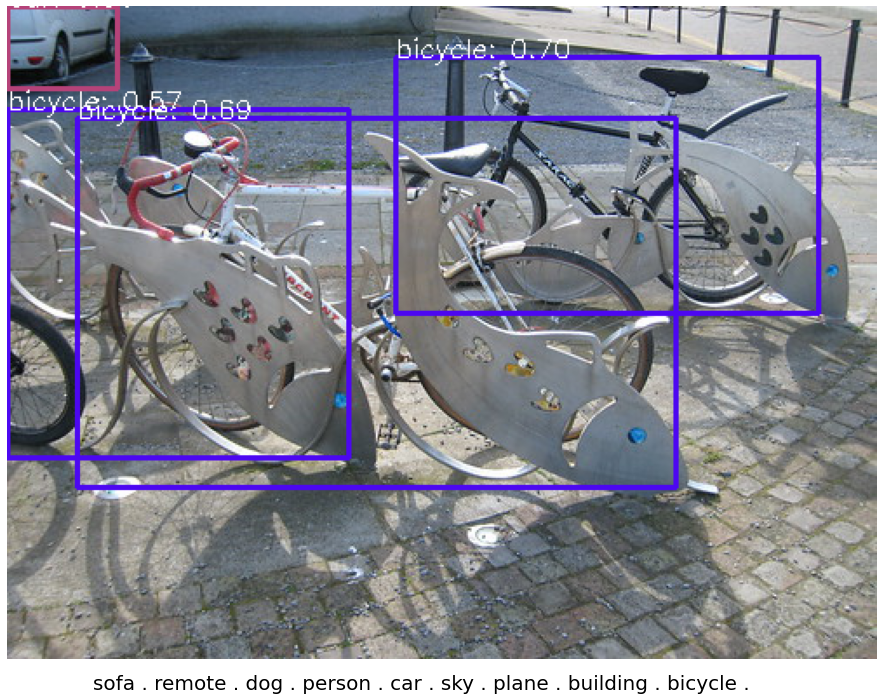

In [ ]:
image = load('http://farm4.static.flickr.com/3207/2450119520_d9f932da12.jpg?v=0')
caption = 'sofa . remote . dog . person . car . sky . plane . building . bicycle . ' # the caption can also be the simple concatonation of some random categories.
result, _ = glip_demo.run_on_web_image(image, caption, 0.5)
imshow(result, caption)